# **Analise exploratória e Visualização de dados**

Pedro H. N. Sobrinho (PSobrinho)

Mail: pedrosobrinho.physics@gmail.com

LinkedIn: https://www.linkedin.com/in/pedro-sobrinho-b84879108/

Instagram: https://www.instagram.com/phnsobrinho/?hl=pt-br


O desenvolvimento a seguir tem como objetivo estudar a análise, exploração e visualização de dados utilizando recursos PyDataStack. Sendo os produtos deste estudo abertos para consulta e estudo por terceiros :)

# **Sobre os dados utilizados**

A base de dados original foi obtida no Kaggle: https://www.kaggle.com/orgesleka/used-cars-database. E consiste de dados coletados do Ebay Alemão sobre carros usaos a venda, contendo:

*   dateCrawled : Quando os dados foram coletados;

*   name : "nome" do carro;

*   seller : se o vendedor é um usuário privado, ou revendedor;

*   offerType;

*   price : o preço anunciado para o carro;

*   abtest;

*   vehicleType;

*   yearOfRegistration : ano em que cada carro foi registrado pela primeira vez;

*   gearbox: tipos de caixa de câmbio;

*   powerPS : Potência do carro em cavalos (PS);

*   model;

*   kilometer : quantos quilometros o carro já rodou;

*   monthOfRegistration : em qual mês o carro foi registrado pela primeira vez;

*   fuelType;

*   brand;

*   notRepairedDamage : possíveis problemas não reparados no veículo;

*   dateCreated : a data que o anuncio foi criado;

*   nrOfPictures : numero de fotos no anuncio (devido a erros de coleta, temos muitos cambos com 0).

*   postalCode;

*   lastSeen : a última vez que o anuncio foi visto online pelo mecanismo de coleta.

O arquivo original foi importado para um DB Postgres, por meio do seguinte procedimento:
* Leitura do script SQL 'usedCars.sql' (disponível na página do projeto) via shell para criação da tabela com os campos descritos anteriormente;
* cópia dos dados do arquivo .csv via shell por meio do camando COPY.

Daí foram extraidos, via queries, diferentes dataframes menores com as informações pertinentes para cada ponto da análise. Um arquivo adicional contendo a conexão com o banco de dados e a produção dos datasets esta disponível no arquivo 'sql_db_connection_result_sets.ipynb'. Os arquivos para cada etapa são:

* **Distribuição de veículos com base no ano de registro**: df1_yearcount.csv;
* **Variações de faixa de preço pelo tipo de veículo**: df2_vehicleprice.csv;
* **Contagem total de veículos à venda conforme tipo de veículo**: df3_vehiclecount.csv;
* **Nº de veículos por marcas**: df4_brandcount.csv;
* **Preço médio com base no tipo de veículo, bem como no tipo de caixa de câmbio**: df5_vehicle_gearbox_price.csv;
* **Preço médio do veículo por tipo de combustível e caixa de câmbio**: df6_fueltype_gearbox_price.csv;
* **Potência Média por tipo de veículo e caixa de câmbio**: df7_vehicle_gearbox_price.csv.

# Analisando e Visualizando os dados

In [0]:
#Importando as bibliotecas: Pandas, Matplotlib e Seaborn:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Analise 1: Distribuição de veículos com base no ano de registro**

In [0]:
df1 = pd.read_csv('data/df1_yearcount.csv', sep = ';')

print(df1)

print(df1.describe())

    yearofregistration  yearcount
0                 1910         46
1                 1915          1
2                 1919          1
3                 1928          1
4                 1929          3
5                 1930          3
6                 1931          2
7                 1933          3
8                 1934          3
9                 1935          3
10                1936          4
11                1937          4
12                1938          3
13                1939          2
14                1940          1
15                1941          1
16                1942          1
17                1943          3
18                1945          1
19                1946          1
20                1947          3
21                1949          2
22                1950         11
23                1951         10
24                1952          4
25                1953         10
26                1954         11
27                1955         14
28            

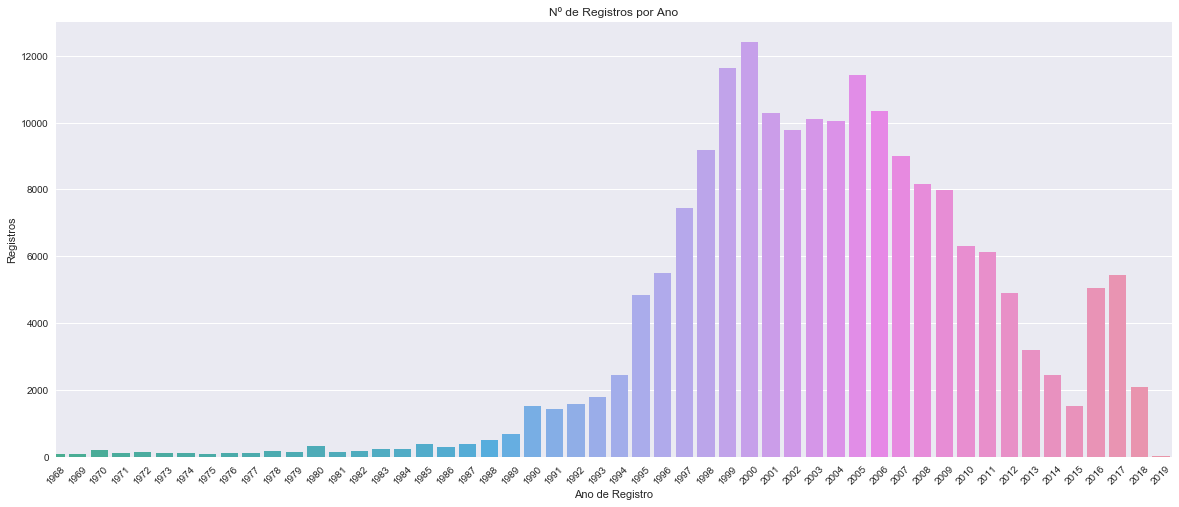

In [0]:
sns.set()

fig1, plot1 = plt.subplots()
sns.barplot(x = 'yearofregistration', y = 'yearcount', data = df1)
plt.xlabel('Ano de Registro')
plt.xlim(left =40)
        
plt.xticks(rotation = 45)
plt.ylabel('Registros')
plt.title('Nº de Registros por Ano')

fig1.set_size_inches(20,8)
plt.savefig('plots/plot1_registration_per_year.jpeg', dpi = 300)

**Analise 2: Variações de faixa de preço pelo tipo de veículo**

In [0]:
df2 = pd.read_csv('data/df2_vehicleprice.csv', sep = ';')

print(df2)

print(df2.describe())

       vehicletype    price
0              NaN    480.0
1            coupe  18300.0
2              suv   9800.0
3       kleinwagen   1500.0
4       kleinwagen   3600.0
5        limousine    650.0
6           cabrio   2200.0
7        limousine      0.0
8              bus  14500.0
9       kleinwagen    999.0
10       limousine   2000.0
11           kombi   2799.0
12           kombi    999.0
13           kombi   2500.0
14             suv  17999.0
15      kleinwagen    450.0
16             NaN    300.0
17      kleinwagen   1750.0
18             bus   7550.0
19             bus   1850.0
20           coupe  10400.0
21       limousine   3699.0
22             NaN   2900.0
23      kleinwagen    450.0
24       limousine    500.0
25           kombi   2500.0
26             NaN   5555.0
27       limousine   6900.0
28             bus   1990.0
29      kleinwagen    690.0
...            ...      ...
189228   limousine    699.0
189229  kleinwagen    600.0
189230   limousine  20400.0
189231         bus  

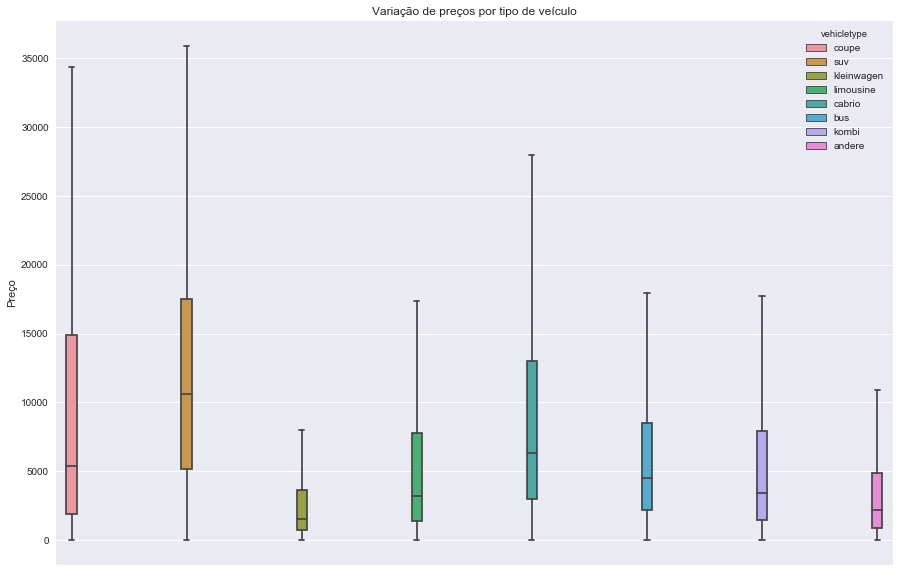

In [0]:
sns.set()

fig2 = plt.figure()
plot2 = sns.boxplot(x= 'vehicletype', y = 'price', hue = 'vehicletype', data = df2, showfliers = False)

plt.xlabel('Tipo de Veículo', visible = False)
plt.xticks(visible = False)
plt.ylabel('Preço')
plt.title('Variação de preços por tipo de veículo')

fig2.set_size_inches(15,10)

plt.savefig('plots/plot2_vehicle_price_variation.jpeg', dpi = 300)

**Análise 3: Contagem total de veículos à venda conforme tipo de veículo**

In [0]:
df3 = pd.read_csv('data/df3_vehiclecount.csv', sep = ';')

print(df3)

print(df3.describe())

  vehicletype  vehiclecount
0      andere          1708
1         bus         15532
2      cabrio         11668
3       coupe          9635
4  kleinwagen         40759
5       kombi         34498
6   limousine         48701
7         suv          7411
8       Other         19437
       vehiclecount
count      9.000000
mean   21038.777778
std    16375.971649
min     1708.000000
25%     9635.000000
50%    15532.000000
75%    34498.000000
max    48701.000000


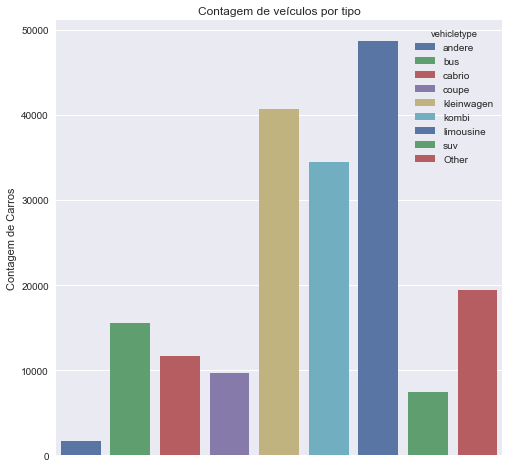

In [0]:
sns.set()

fig3 = plt.figure()
plto3 = sns.barplot(x = 'vehicletype', y = 'vehiclecount', hue = 'vehicletype', data = df3, dodge = False, palette = 'deep')
plt.xticks(visible = False)
plt.xlabel('')
plt.ylabel('Contagem de Carros')
plt. title('Contagem de veículos por tipo')

fig3.set_size_inches(8,8)

plt.savefig('plots/plot3_count_per_type.jpeg', dpi = 300)

** Análise 4: Nº de veículos por marcas**

In [0]:
df4 = pd.read_csv('data/df4_brandcount.csv', sep = ';')

df4 = df4.sort_values('brandcount', ascending = False).reset_index()

print(df4)

print(df4.describe())

    index           brand  brandcount
0      38      volkswagen       40670
1       2             bmw       20540
2      24            opel       20416
3      20   mercedes_benz       17925
4       1            audi       16674
5      10            ford       13090
6      27         renault        9144
7      25         peugeot        5695
8       9            fiat        4935
9      30            seat        3531
10     19           mazda        2941
11     31           skoda        2922
12     32           smart        2759
13      5         citroen        2633
14     23          nissan        2564
15     36          toyota        2385
16     33  sonstige_autos        1966
17     12         hyundai        1830
18     39           volvo        1721
19     21            mini        1708
20     22      mitsubishi        1519
21     11           honda        1429
22     15             kia        1280
23     35          suzuki        1195
24      0      alfa_romeo        1184
25     26   

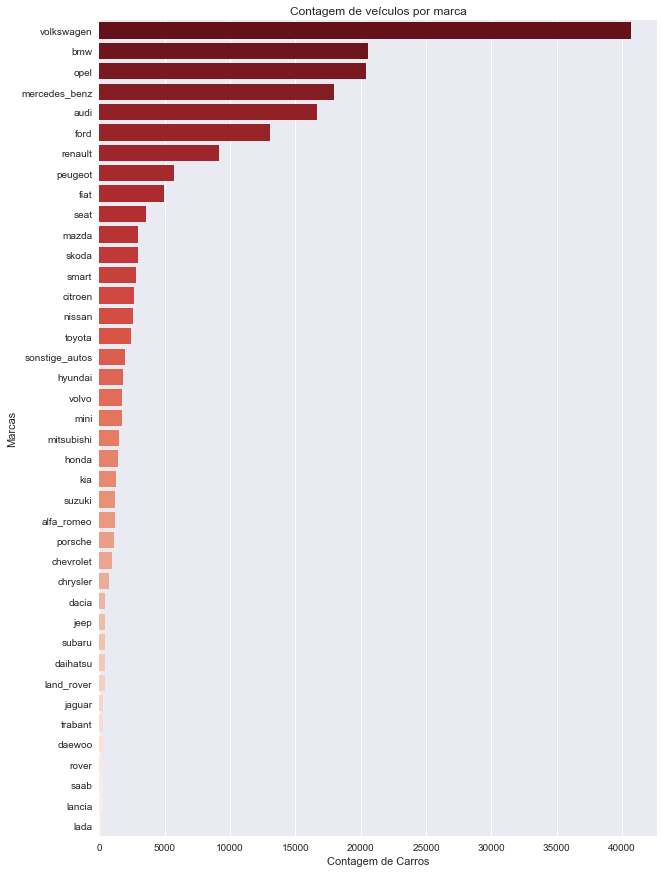

In [0]:
sns.set()
fig4 = plt.figure()
pltot4 = sns.barplot(x = 'brandcount', y = 'brand', data = df4, palette = 'Reds_r')

plt.xlabel('Contagem de Carros')
plt.ylabel('Marcas')
plt.title('Contagem de veículos por marca')

fig4.set_size_inches(10,15)

plt.savefig('plots/plot4_count_per_brand.jpeg', dpi = 300)

**Analise 5: Preço médio com base no tipo de veículo, bem como no tipo de caixa de câmbio**

In [0]:
df5 = pd.read_csv('data/df5_vehicle_gearbox_price.csv', sep = ';')

print(df5)

print(df5.describe())

       vehicletype    gearbox    price
0              NaN    manuell    480.0
1            coupe    manuell  18300.0
2              suv  automatik   9800.0
3       kleinwagen    manuell   1500.0
4       kleinwagen    manuell   3600.0
5        limousine    manuell    650.0
6           cabrio    manuell   2200.0
7        limousine    manuell      0.0
8              bus    manuell  14500.0
9       kleinwagen    manuell    999.0
10       limousine    manuell   2000.0
11           kombi    manuell   2799.0
12           kombi    manuell    999.0
13           kombi    manuell   2500.0
14             suv    manuell  17999.0
15      kleinwagen        NaN    450.0
16             NaN        NaN    300.0
17      kleinwagen  automatik   1750.0
18             bus    manuell   7550.0
19             bus    manuell   1850.0
20           coupe    manuell  10400.0
21       limousine  automatik   3699.0
22             NaN    manuell   2900.0
23      kleinwagen    manuell    450.0
24       limousine    man

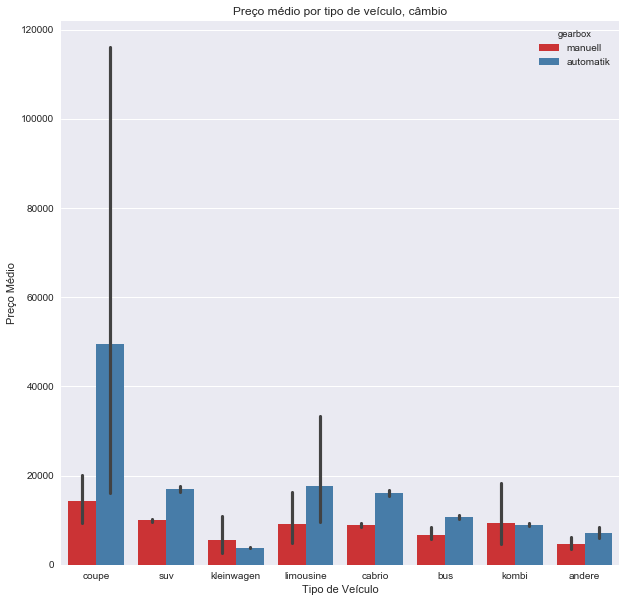

In [0]:
sns.set()
fig5 = plt.figure()
plto5 = sns.barplot(x = 'vehicletype', y = 'price', hue = 'gearbox', data = df5, palette = 'Set1')

plt.xlabel('Tipo de Veículo')
plt.ylabel('Preço Médio')
plt.title('Preço médio por tipo de veículo, câmbio')

fig5.set_size_inches(10,10)

plt.savefig('plots/plot5_price_per_vhiclegear.jpeg', dpi = 300)

**Analise 6: Preço médio do veículo por tipo de combustível e caixa de câmbio**

In [0]:
df6 = pd.read_csv('data/df6_fueltype_gearbox_price.csv', sep = ';')

print(df6)

print(df6.describe())

       fueltype    gearbox    price
0        benzin    manuell    480.0
1        diesel    manuell  18300.0
2        diesel  automatik   9800.0
3        benzin    manuell   1500.0
4        diesel    manuell   3600.0
5        benzin    manuell    650.0
6        benzin    manuell   2200.0
7        benzin    manuell      0.0
8        benzin    manuell  14500.0
9           NaN    manuell    999.0
10       benzin    manuell   2000.0
11       diesel    manuell   2799.0
12       benzin    manuell    999.0
13          NaN    manuell   2500.0
14       diesel    manuell  17999.0
15       benzin        NaN    450.0
16       benzin        NaN    300.0
17       benzin  automatik   1750.0
18       diesel    manuell   7550.0
19       benzin    manuell   1850.0
20       benzin    manuell  10400.0
21       benzin  automatik   3699.0
22       benzin    manuell   2900.0
23       benzin    manuell    450.0
24       benzin    manuell    500.0
25       diesel  automatik   2500.0
26          NaN    manuell  

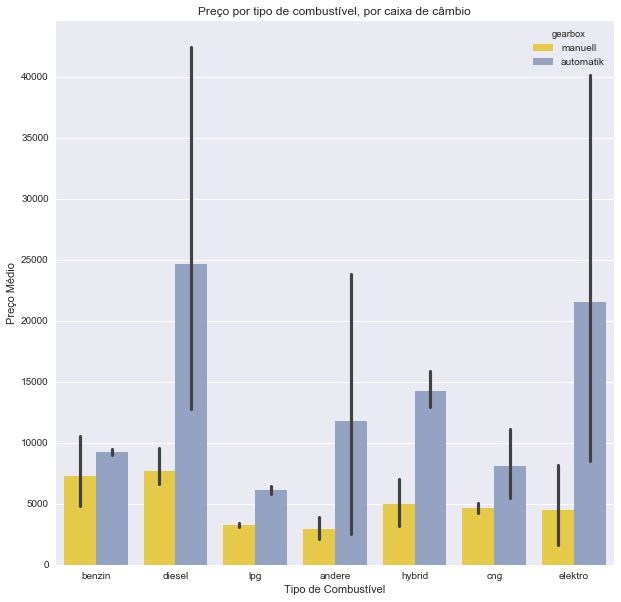

In [0]:
fig6 = plt.figure()
plto6 = sns.barplot(x = 'fueltype', y = 'price', hue = 'gearbox', data = df6, palette = 'Set2_r')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio')
plt.title('Preço por tipo de combustível, por caixa de câmbio')

fig6.set_size_inches(10,10)

plt.savefig('plots/plot6_price_per_fuelgear.jpeg', dpi = 300)

**Analise 7: Potência Média por tipo de veículo e caixa de câmbio**

In [0]:
df7 = pd.read_csv('data/df7_vehicle_gearbox_price.csv', sep = ';')

print(df7)

print(df7.describe())

       vehicletype    gearbox  powerps
0              NaN    manuell      0.0
1            coupe    manuell    190.0
2              suv  automatik    163.0
3       kleinwagen    manuell     75.0
4       kleinwagen    manuell     69.0
5        limousine    manuell    102.0
6           cabrio    manuell    109.0
7        limousine    manuell     50.0
8              bus    manuell    125.0
9       kleinwagen    manuell    101.0
10       limousine    manuell    105.0
11           kombi    manuell    140.0
12           kombi    manuell    115.0
13           kombi    manuell    131.0
14             suv    manuell    190.0
15      kleinwagen        NaN      0.0
16             NaN        NaN     60.0
17      kleinwagen  automatik     75.0
18             bus    manuell    136.0
19             bus    manuell    102.0
20           coupe    manuell    160.0
21       limousine  automatik    231.0
22             NaN    manuell     90.0
23      kleinwagen    manuell     50.0
24       limousine    man

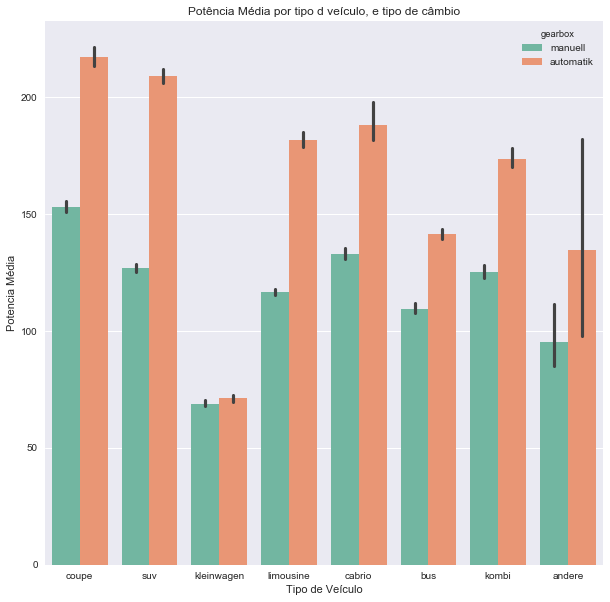

In [0]:
fig7 = plt.figure()
plot7 = sns.barplot(x = 'vehicletype', y = 'powerps', hue = 'gearbox', data = df7, palette = 'Set2')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Potencia Média')
plt.title('Potência Média por tipo d veículo, e tipo de câmbio')

fig7.set_size_inches(10,10)

plt.savefig('plots/plot7_powerps_per_vehiclegear.jpeg', dpi = 300)